# Rubber Duck Usage - 2024-01-26

In [51]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import json

### IDs and Pricing

In [52]:
guilds = {
    1058490579799003187: 'BeanLab',
    927616651409649675: 'CS 110',
    1008806488384483338: 'CS 111',
    747510855536738336: 'CS 235',
    748656649287368704: 'CS 260',
    1128355484039123065: 'CS 312'
}

In [53]:
pricing = {
    'gpt-4': [0.03, 0.06],
    'gpt-4-1106-preview': [0.01, 0.03],
    'gpt-4-0125-preview': [0.01, 0.03],
    'gpt-4o-mini' : [.0003, .0012],
    'gpt-4-turbo-preview': [0.01, 0.03],
    'gpt-3.5-turbo-1106': [0.001, 0.002],
    'gpt-3.5-turbo': [0.001, 0.003]
}

## Load Usage Data

In [54]:
past_data = Path('sample_metrics/')

In [73]:
usage = pd.read_csv("sample_metrics/usage.csv", parse_dates=['timestamp'])

In [74]:
usage['server'] = usage.guild_id.apply(guilds.get)

In [75]:
usage['month'] = usage.timestamp.dt.year.apply(str) + '-' + usage.timestamp.dt.month.apply(lambda m: f'{m:02}')

In [97]:
tz_offset = -7
usage["hour_of_day"] = (usage.timestamp.dt.hour + tz_offset) % 24

,timestamp,guild_id,thread_id,user_id,engine,input_tokens,output_tokens,server,month,time_of_day,hour_of_day
0,2024-04-30 13:04:23.704118-06:00,1058490579799003187,1234943435027255366,911012305880358952,gpt-3.5-turbo,14,9,BeanLab,2024-04,6,6
1,2024-04-30 13:04:59.996258-06:00,1058490579799003187,1234943566665744496,911012305880358952,gpt-3.5-turbo,15,18,BeanLab,2024-04,6,6
2,2024-04-30 14:39:31.937756-06:00,747510855536738336,1234967291737673749,911012305880358952,gpt-4-turbo-preview,503,247,CS 235,2024-04,7,7
3,2024-04-30 16:20:31.917441-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,511,18,CS 111,2024-04,9,9
4,2024-04-30 16:22:48.799686-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,760,105,CS 111,2024-04,9,9
5,2024-04-30 16:23:32.666365-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,1027,83,CS 111,2024-04,9,9
6,2024-04-30 16:24:32.494478-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,1320,130,CS 111,2024-04,9,9
7,2024-04-30 16:26:52.034102-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,1460,18,CS 111,2024-04,9,9
8,2024-04-30 16:28:05.742757-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,1515,149,CS 111,2024-04,9,9
9,2024-04-30 16:28:32.440031-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,1685,47,CS 111,2024-04,9,9


In [58]:
def compute_cost(row):
    ip, op = pricing.get(row.get('engine', 'gpt-4'), (0,0))
    return row['input_tokens'] / 1000 * ip + row['output_tokens'] / 1000 * op

usage['cost'] = usage.apply(compute_cost, axis=1)

In [59]:
usage

,timestamp,guild_id,thread_id,user_id,engine,input_tokens,output_tokens,server,month,cost
0,2024-04-30 13:04:23.704118-06:00,1058490579799003187,1234943435027255366,911012305880358952,gpt-3.5-turbo,14,9,BeanLab,2024-04,0.000041
1,2024-04-30 13:04:59.996258-06:00,1058490579799003187,1234943566665744496,911012305880358952,gpt-3.5-turbo,15,18,BeanLab,2024-04,0.000069
2,2024-04-30 14:39:31.937756-06:00,747510855536738336,1234967291737673749,911012305880358952,gpt-4-turbo-preview,503,247,CS 235,2024-04,0.012440
3,2024-04-30 16:20:31.917441-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,511,18,CS 111,2024-04,0.005650
4,2024-04-30 16:22:48.799686-06:00,1008806488384483338,1234992628349669446,1149009402582544386,gpt-4-turbo-preview,760,105,CS 111,2024-04,0.010750
...,...,...,...,...,...,...,...,...,...,...
16391,2024-09-17 16:07:40.478614-06:00,1235303213796691998,1285713822337994775,953482859862175834,gpt-4o,2194,87,None,2024-09,0.000000
16392,2024-09-17 16:07:50.702919-06:00,747510855536738336,1285722128565403690,1194017837761708082,gpt-4o,1786,54,CS 235,2024-09,0.000000
16393,2024-09-17 16:08:06.833884-06:00,747510855536738336,1285723123064508417,1019640478729261076,gpt-4o,713,25,CS 235,2024-09,0.000000
16394,2024-09-17 16:08:30.042838-06:00,747510855536738336,1285723123064508417,1019640478729261076,gpt-4o,756,29,CS 235,2024-09,0.000000


## Cost per month

In [60]:
usage.groupby('month').cost.sum().reset_index()

,month,cost
0,2024-04,0.74475
1,2024-05,43.83558
2,2024-06,0.00000
3,2024-07,0.00000
4,2024-08,0.00000
5,2024-09,0.00000


### Per server

<Axes: xlabel='month', ylabel='cost'>

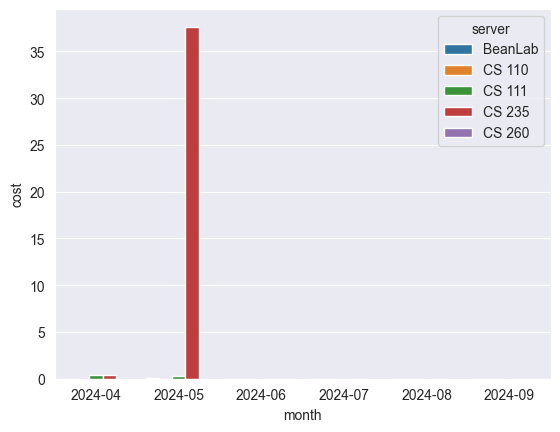

In [61]:
sbn.barplot(
    data=usage.groupby(['server', 'month']).cost.sum().reset_index(),
    x='month',
    y='cost',
    hue='server'
)

### Total

StopIteration: 

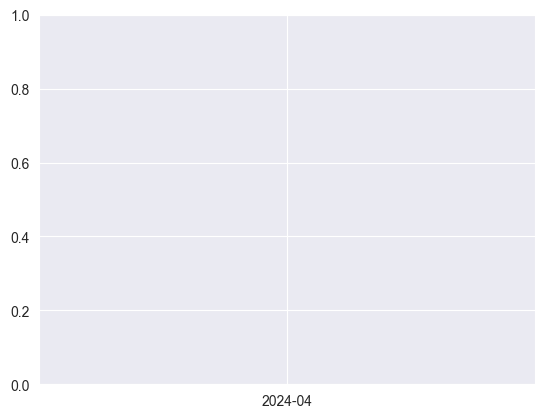

In [62]:
# sbn.barplot(
#     data=usage.groupby(['month']).cost.sum().reset_index(),
#     x='month',
#     y='cost',
# )

**NOTE**

2024-01-26: the default engine was changed from `gpt-4` to `gpt-4-turbo-preview` which reduced the pricing from 0.03/0.06 to 0.01/0.02 (input/output per 1k tokens).

## Usage Time-of-day

In [116]:
usage["hour_of_day"].value_counts().sort_index().reset_index()


,hour_of_day,count
0,0,58
1,1,205
2,2,434
3,3,988
4,4,1227
5,5,1105
6,6,1027
7,7,838
8,8,1571
9,9,1758


In [119]:
df = usage["hour_of_day"].value_counts().sort_index().reset_index()

# Rename columns for clarity (optional)
df.columns = ['hour_of_day', 'count']

StopIteration: 

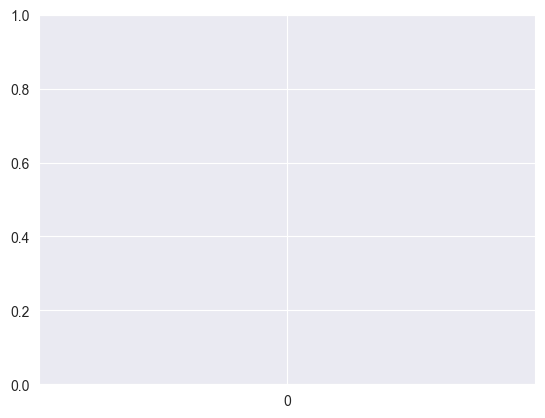

In [121]:
sbn.barplot(
    data=df,
    x='hour_of_day',
    y='count'
)
plt.xlabel('Hour of day')
plt.ylabel('# of conversations')

# Add typical TA working hours
xlim = plt.xlim()
ylim = plt.ylim()

plt.plot([9-1, 9-1], ylim, ls='--', c='k')  # subtract 1 to account for 0 hour label
plt.plot([18-1, 18-1], ylim, ls='--', c='k')

plt.xlim(xlim)
plt.ylim(ylim)

## Number of conversations per month per server

Text(0, 0.5, '# of conversations')

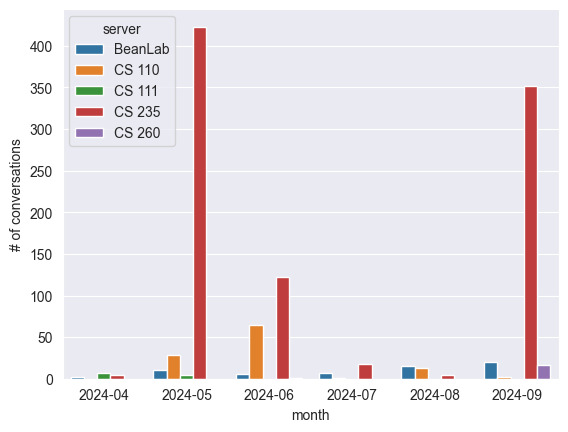

In [65]:
sbn.barplot(
    data=usage.groupby(['server', 'month']).thread_id.nunique().reset_index(),
    x='month',
    y='thread_id',
    hue='server'
)
plt.ylabel('# of conversations')

## Number of users per month per server

Text(0, 0.5, '# of users')

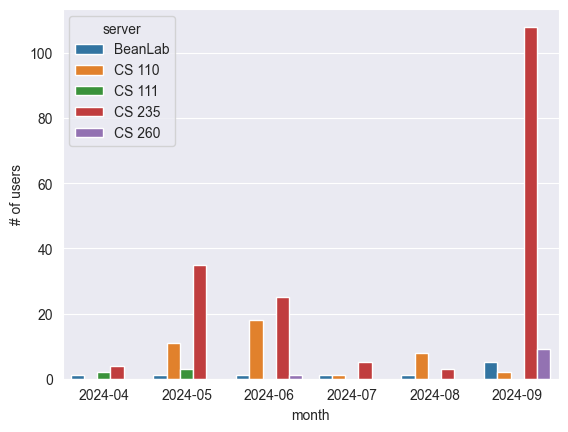

In [67]:
sbn.barplot(
    data=usage.groupby(['server', 'month']).user_id.nunique().reset_index(),
    x='month',
    y='user_id',
    hue='server'
)
plt.ylabel('# of users')

## Number of coversations per user per month per server

Text(0, 0.5, '# of conversations per user')

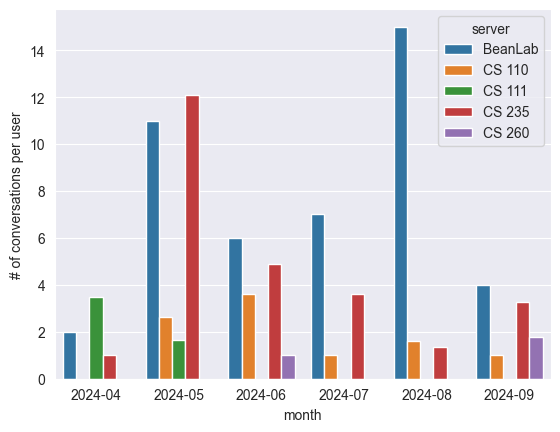

In [69]:
sbn.barplot(
    data=(usage.groupby(['server', 'month']).thread_id.nunique() 
          / usage.groupby(['server', 'month']).user_id.nunique()).reset_index(),
    x='month',
    y=0,
    hue='server'
)
plt.ylabel('# of conversations per user')

## Miscellaneous Findings

### Conversation lengths (tokens)

In [ ]:
sbn.boxplot(
    data=usage.groupby(['guild','thread_id']).input_tokens.max().reset_index(),
    x='guild',
    y='input_tokens'
)
plt.title('Conversation lengths across servers')
plt.xlabel('Server')
plt.ylabel('Conversation length (tokens)')

### Conversation lengths (messages)

In [ ]:
sbn.boxplot(
    data=usage.groupby(['guild','thread_id']).input_tokens.count().reset_index(),
    x='guild',
    y='input_tokens'
)
plt.title('Conversation lengths across servers')
plt.xlabel('Server')
plt.ylabel('Conversation length (messages)')

### Conversation lengths per month (messages)

In [ ]:
sbn.boxplot(
    data=usage.groupby(['server', 'month', 'thread_id']).input_tokens.count().reset_index(),
    x='month',
    y='input_tokens',
    hue='server'
)
plt.title('Conversation lengths across servers')
plt.xlabel('Period')
plt.ylabel('Conversation length (messages)')
plt.ylim([0, 100])

### Cost per conversation per month

In [ ]:
sbn.boxplot(
    data=usage.groupby(['server', 'month', 'thread_id']).cost.sum().reset_index(), 
    x='month', y='cost', hue='server'
)
plt.ylabel('Coversation cost')
plt.xlabel('Month')
plt.legend(title='Server')
plt.ylim([0, 10])

In [ ]:
sbn.barplot(data=usage.groupby('period').cost.sum().reset_index(), x='month', y='cost')
plt.ylabel('Monthly cost')
plt.xlabel('Month')

### Rubber duck hourly pay-rate

Assume 60 words/minute (typical conversation is closer to 120, but this is technical material being discussed).

In [ ]:
word_rate = 60 # w/min

In [ ]:
user_minutes = usage.groupby(['server', 'period', 'thread_id']).input_tokens.max() / word_rate
bot_minutes = usage.groupby(['server', 'period', 'thread_id']).output_tokens.sum() / word_rate
convo_minutes = (user_minutes + bot_minutes) # .reset_index().rename({0: 'minutes'}, axis=1)
total_hours = convo_minutes.sum() / 60
total_cost = usage.cost.sum()
duck_rate = total_cost / total_hours

In [ ]:
total_hours, total_cost, duck_rate

Now assume that we pay the duck for 24 hours a day to sit around and answer questions...

In [ ]:
usage.cost.sum() / usage.timestamp.dt.day_of_year.nunique() / 24

### How many conversations per user per month

In [ ]:
sbn.histplot(
    data=usage.groupby(['server', 'user_id']).thread_id.nunique().reset_index(),
    x='thread_id',
    hue='server',
    multiple='dodge',
    bins=range(1, 15)
)
plt.xlabel('# of conversations')
plt.ylabel('# of users')

### How many "long" conversations?

In [ ]:
usage.groupby('thread_id').user_id.count().hist(bins=30)

In [ ]:
usage.groupby('thread_id').user_id.count().gt(30).sum()

In [ ]:
usage.groupby('thread_id').cost.sum().groupby(usage.groupby('thread_id').user_id.count().gt(30)).sum()

**More than half the cost comes from "long" conversations!**

In [ ]:
usage.groupby('thread_id').cost.sum().groupby(usage.groupby('thread_id').user_id.count().gt(35)).sum()